1. Download the supporting excel file titled data_assignment1.xlsx. Import it into 
Python, along with the modules that you will need for this assignment (pandas 
numpy, os, pyplot). Assign the imported file to a variable df

In [28]:
# Step 1: import necessary libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# defining path
path = r'C:/Users/Admin/OneDrive/Рабочий стол/Daryna Q Fin/'
file = 'data_assignment1.xlsx'

# loading the excel file into pandas DataFrame
df = pd.read_excel(os.path.join(path, file))
df

,Date,META,AAPL,GOOG,NFLX
0,2024-03-07,-0.012258,0.010185,0.007734,-0.006082
1,2024-03-08,-0.012258,0.010185,0.007734,-0.006082
2,2024-03-11,-0.045200,0.011762,0.019257,-0.006452
3,2024-03-12,0.032871,0.002775,0.004882,0.016749
4,2024-03-13,-0.008399,-0.012197,0.008203,-0.002671
...,...,...,...,...,...
122,2024-08-30,0.005945,-0.003444,0.010411,0.012728
123,2024-09-03,-0.018489,-0.027582,-0.040164,-0.037820
124,2024-09-04,-0.018489,-0.008656,-0.005057,0.006435
125,2024-09-05,-0.018489,0.006904,0.004994,0.005780


In [46]:
#checking what columns are available
print(df.columns)
print(df.index) #проверить индексы
df.reset_index(inplace=True) # resetting the index -> 'Date' is moved back as a regular column

Index(['index', 'META', 'AAPL', 'GOOG', 'NFLX'], dtype='object')
DatetimeIndex(['2024-03-07', '2024-03-08', '2024-03-11', '2024-03-12',
               '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-18',
               '2024-03-19', '2024-03-20',
               ...
               '2024-08-23', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30', '2024-09-03', '2024-09-04',
               '2024-09-05', '2024-09-06'],
              dtype='datetime64[ns]', name='Date', length=127, freq=None)


2. Set Date column as index of df. Drop the old index. 

In [48]:
# Step 2: setting 'Date' as an index in df
df.set_index('Date', inplace=True)
df.head()

,index,META,AAPL,GOOG,NFLX
Date,,,,,
2024-03-07,0,-0.012258,0.010185,0.007734,-0.006082
2024-03-08,1,-0.012258,0.010185,0.007734,-0.006082
2024-03-11,2,-0.045200,0.011762,0.019257,-0.006452
2024-03-12,3,0.032871,0.002775,0.004882,0.016749
2024-03-13,4,-0.008399,-0.012197,0.008203,-0.002671


3. Generate a column in df titled “Ret_equal”, which is calculated as the average daily return of the four stocks in the imported Excel file (0.25*META + 0.25*AAPL + …)

In [50]:
# Step 3: calculating the average daily return (equal-weighted)
df['Ret_equal'] = 0.25 * df['META'] + 0.25 * df['AAPL'] + 0.25 * df['GOOG'] + 0.25 * df['NFLX']
df

,index,META,AAPL,GOOG,NFLX,Ret_equal
Date,,,,,,
2024-03-07,0,-0.012258,0.010185,0.007734,-0.006082,-0.000105
2024-03-08,1,-0.012258,0.010185,0.007734,-0.006082,-0.000105
2024-03-11,2,-0.045200,0.011762,0.019257,-0.006452,-0.005158
2024-03-12,3,0.032871,0.002775,0.004882,0.016749,0.014319
2024-03-13,4,-0.008399,-0.012197,0.008203,-0.002671,-0.003766
...,...,...,...,...,...,...
2024-08-30,122,0.005945,-0.003444,0.010411,0.012728,0.006410
2024-09-03,123,-0.018489,-0.027582,-0.040164,-0.037820,-0.031014
2024-09-04,124,-0.018489,-0.008656,-0.005057,0.006435,-0.006442


4. Generate a column in df titled “Ret_random”, which is calculated as the randomlyweighted average daily return of four stocks in the imported Excel file:
 a. Use numpy to generate a numpy array containing four random numbers with the minimum value of 0 and the maximum value of 1.
NB! Hint: google/check documentation for numpy.random.uniform
 b. Make sure the generated weights sum to one. To do this, divide each element in your weights array by the sum of weights in the array
 c. Generate the “Ret_random” column by multiplying the random weights 
obtained in point b by their respective stock return

In [56]:
# Step 4a: firstly, generating 4 random numbers between 0 and 1
random_weights = np.random.uniform(0, 1, 4)

# Step 4b: we need to normalize the weights so their sum = 1
random_weights = random_weights / np.sum(random_weights)

# Step 4c: generate a new column 'Ret_random' by applying the random weights
df['Ret_random'] = (random_weights[0] * df['META'] +
                    random_weights[1] * df['AAPL'] +
                    random_weights[2] * df['GOOG'] +
                    random_weights[3] * df['NFLX'])

df

,index,META,AAPL,GOOG,NFLX,Ret_equal,Ret_random
Date,,,,,,,
2024-03-07,0,-0.012258,0.010185,0.007734,-0.006082,-0.000105,-0.004097
2024-03-08,1,-0.012258,0.010185,0.007734,-0.006082,-0.000105,-0.004097
2024-03-11,2,-0.045200,0.011762,0.019257,-0.006452,-0.005158,-0.016118
2024-03-12,3,0.032871,0.002775,0.004882,0.016749,0.014319,0.019211
2024-03-13,4,-0.008399,-0.012197,0.008203,-0.002671,-0.003766,-0.006740
...,...,...,...,...,...,...,...
2024-08-30,122,0.005945,-0.003444,0.010411,0.012728,0.006410,0.006194
2024-09-03,123,-0.018489,-0.027582,-0.040164,-0.037820,-0.031014,-0.028030
2024-09-04,124,-0.018489,-0.008656,-0.005057,0.006435,-0.006442,-0.007166


5. Now that you know how to generate random weights and calculate returns, repeat that experiment a thousand times:
 a. Create a variable i and assign the value of zero to it
 b. Create an empty dictionary and call it rand_dict
 c. Run a while-loop. Within the loop, generate random weights just like you did in Step 4 and calculate “Ret_random”
 d. Assign the value of i as the dictionary key, and the average value of Ret_random as the dictionary value. Add to the i variable to define your limiting condition (otherwise your while loop will run infinitely).
 e. Print your generated returns in a new Jupyter cell

In [66]:
# Step 5a: assigning value of 0 to variable i
i = 0

# Step 5b: creating an empty dictionary where we are gonna store results
rand_dict = {}

# Step 5c: running a while loop 1000 times
while i < 1000:
    random_weights = np.random.uniform(0, 1, 4) # генерируем рандомные random weights [0;1]
    random_weights = random_weights / np.sum(random_weights) # normalizing the weights so that their sum = 1
    
   # calculating the random-weighted return for this loop round
    df['Ret_random'] = (random_weights[0] * df['META'] +
                        random_weights[1] * df['AAPL'] +
                        random_weights[2] * df['GOOG'] +
                        random_weights[3] * df['NFLX'])
    
# Step 5d: store the average of 'Ret_random' in the dictionary
    rand_dict[i] = df['Ret_random'].mean()  # average of the 'Ret_random' column
    
    # increment i to avoid infinite loop
    i += 1

In [68]:
print(rand_dict)

{0: 0.0006069984237995108, 1: 0.001061454884031361, 2: 0.0007371257707810443, 3: 0.0010022053124661664, 4: 0.0005463967323898667, 5: 0.00021945437256046984, 6: 0.0005238977037232622, 7: 0.000245870411043719, 8: 0.0009190514314740985, 9: 0.0013222686896398942, 10: 0.0004633659988812756, 11: 0.0007011461350667445, 12: 0.0005759810024595422, 13: 0.0006262083005997206, 14: 0.0008122071496067811, 15: 0.000841887674700168, 16: 0.0007838405049478412, 17: 0.00048163047933690685, 18: 0.0009828376162448855, 19: 0.0003138291736138414, 20: 0.0015177780992649541, 21: 0.0009222082213411909, 22: 0.0005454156452756012, 23: 0.001160017241081277, 24: 0.000552867611876867, 25: 0.0006944374102335441, 26: 0.0011246203040029554, 27: 0.0007852976289347544, 28: 0.0008483306433826821, 29: 0.0006225777771991728, 30: 0.00103712150010523, 31: 0.0006732324852661155, 32: 0.0008620456699054605, 33: 0.0010105391285383937, 34: 0.0005680547409189391, 35: 0.000553935939349261, 36: 0.0009961697994932612, 37: 0.0001040499

6. Finally, we want to know in how many cases the equally-weighted strategy outperformed the random-weight strategy. We’ll do this by comparing average returns over the period:
 a. Generate an empty dictionary named eq_dict
 b. Run the same while-loop that you ran in Step 5; however, replace rand_dictwith eq_dict where applicable and remove the part that calculates portfolio returns and weights. No need to recalculate Ret_equal within the loop, as the values in this column are non-random. Assign the values of i (number of “simulation”) as dictionary keys, and the average of Ret_equal as dictionary values
 c. Create an empty list called result_list
 d. Run a for-loop for keys of eq_dict. You will have nested if-statements in this for-loop: if for that specific simulation, the return of the equally-weighted strategy is bigger than that of a randomly weighted strat, append the value of 1 to the list. Else append zero
 e. Calculate the average value of elements in result_list. Hint: average = sum of elements divided by the number of elements

In [70]:
# Step 6a: creating an empty dictionary for equally-weighted strategy results
eq_dict = {}

# Step 6b: running the same while-loop as Step 5 to fill eq_dict with average of 'Ret_equal'
i = 0
while i < 1000:
    # 'Ret_equal' is fixed and non-random, so we can just take its mean for each loop round
    eq_dict[i] = df['Ret_equal'].mean()
    i += 1 # to avoid infinite loop

# Step 6c: creating an empty list to where we gonna store comparison results
result_list = []

# Step 6d: runnning a for-loop to compare eq_dict and rand_dict
for key in eq_dict.keys():
    if eq_dict[key] > rand_dict[key]:
        result_list.append(1)  # append 1 if equally-weighted strategy outperforms
    else:
        result_list.append(0)  # append 0 if random strategy outperforms

# Step 6e: calculating the average value of elements in result_list
average_result = sum(result_list) / len(result_list)

In [74]:
print(f"Proportion of times equally-weighted strategy outperformed the random-weight strategy: {average_result}")

Proportion of times equally-weighted strategy outperformed the random-weight strategy: 0.492


7. Coming back to df, plot the Ret_random and Ret_equal columns in the same plot.

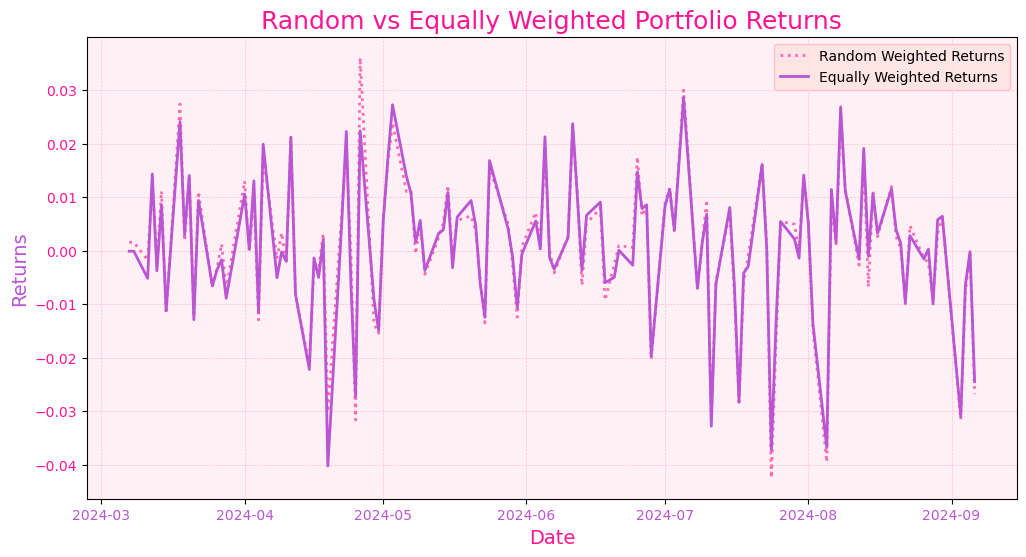

In [92]:
# Step 7: Plot
plt.figure(figsize=(12, 6))
# Ret_random with a pink dotted line
plt.plot(df.index, df['Ret_random'], label='Random Weighted Returns', color='#FF69B4', linestyle=':', linewidth=2)
# Ret_equal with a purple solid line
plt.plot(df.index, df['Ret_equal'], label='Equally Weighted Returns', color='#BA55D3', linestyle='-', linewidth=2)

plt.title('Random vs Equally Weighted Portfolio Returns', fontsize=18, color='#FF1493')
plt.xlabel('Date', fontsize=14, color='#FF1493')
plt.ylabel('Returns', fontsize=14, color='#BA55D3') 

# customizing tick colors
plt.xticks(color='#BA55D3')
plt.yticks(color='#FF1493')


plt.grid(True, color='#FFC0CB', linestyle='--', linewidth=0.5)
plt.legend(facecolor='#FFE4E1', edgecolor='#FFB6C1')
plt.gca().set_facecolor('#FFF0F5')

plt.show()

8. Finally, let’s have some fun and talk about cars. Create a list containing five elements:'BMW', 'BMW', 'Porsche', 'Audi', 'Mercedes' and call it lst. Then create a set containing five elements: 'BMW', 'BMW', 'Porsche', 'Audi', 'Mercedes' and call it set

In [80]:
# Step 8: 
lst = ['BMW', 'BMW', 'Porsche', 'Audi', 'Mercedes'] # creating a list
set = {'BMW', 'BMW', 'Porsche', 'Audi', 'Mercedes'} # creating a set

print("List:", lst)
print("Set:", set)

List: ['BMW', 'BMW', 'Porsche', 'Audi', 'Mercedes']
Set: {'Audi', 'Porsche', 'Mercedes', 'BMW'}


# Step 9: 
1. List (or as it defined lst) allows duplicates. In our case element "BMW" appeared twice. Also, the order of elements is preserved. since list keeps the elements in order they were added.
2. Set, on the other hand, does not allow duplicates (it automatically removed "BMW", even though it was added twice). In addition, since sets are unoredred collections, the elements may appear in any order. 

10. Generate a dictionary called ret_dict. Run a for-loop that will assign stock tickers as dictionary keys, and their respective return series from df as dictionary values. 

In [94]:
# Step 10: 
# generating ret_dict with stock tickers as keys and their return series as values
# должно быть как: each ticker in the dictionary has a corresponding return series
ret_dict = {}

# loop through the columns of interest (excluding 'Ret_equal' and 'Ret_random')
for ticker in ['META', 'AAPL', 'GOOG', 'NFLX']:
    ret_dict[ticker] = df[ticker]  # assigning the return series to the dictionary

print(ret_dict)

{'META': Date
2024-03-07   -0.012258
2024-03-08   -0.012258
2024-03-11   -0.045200
2024-03-12    0.032871
2024-03-13   -0.008399
                ...   
2024-08-30    0.005945
2024-09-03   -0.018489
2024-09-04   -0.018489
2024-09-05   -0.018489
2024-09-06   -0.022708
Name: META, Length: 127, dtype: float64, 'AAPL': Date
2024-03-07    0.010185
2024-03-08    0.010185
2024-03-11    0.011762
2024-03-12    0.002775
2024-03-13   -0.012197
                ...   
2024-08-30   -0.003444
2024-09-03   -0.027582
2024-09-04   -0.008656
2024-09-05    0.006904
2024-09-06   -0.007040
Name: AAPL, Length: 127, dtype: float64, 'GOOG': Date
2024-03-07    0.007734
2024-03-08    0.007734
2024-03-11    0.019257
2024-03-12    0.004882
2024-03-13    0.008203
                ...   
2024-08-30    0.010411
2024-09-03   -0.040164
2024-09-04   -0.005057
2024-09-05    0.004994
2024-09-06   -0.041650
Name: GOOG, Length: 127, dtype: float64, 'NFLX': Date
2024-03-07   -0.006082
2024-03-08   -0.006082
2024-03-11   -0.006